Kriss Sitapara Assignment 1A

Simulation of Multivariate Normal Distribution

In [23]:
#importing essentials
import torch
import matplotlib.pyplot as plt

In [24]:
#setting matrix
amean = torch.tensor([-0.5, -0.5])
acov = torch.tensor([[1.0, 0.25], [0.25, 1.0]])

bmean = torch.tensor([0.5, 0.5])
bcov = torch.tensor([[1.0, 0.25], [0.25, 1.0]])

In [25]:
#creating distribution and samples
adistribution = torch.distributions.MultivariateNormal(amean, acov)
asamples = adistribution.sample((1000,))

bdistribution = torch.distributions.MultivariateNormal(bmean, bcov)
bsamples = bdistribution.sample((1000,))

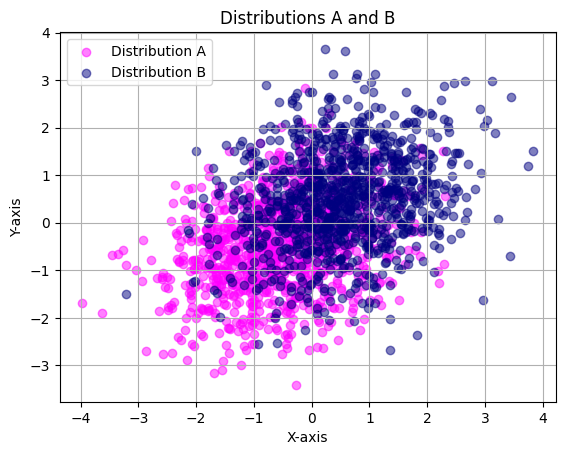

Stacked tensor shape: torch.Size([2000, 2])


In [26]:
#plotting in mathpotlib
plt.scatter(asamples[:, 0], asamples[:, 1], label='Distribution A', color='magenta', alpha=0.5)
plt.scatter(bsamples[:, 0], bsamples[:, 1], label='Distribution B', color='navy', alpha=0.5)
plt.title('Distributions A and B')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()
X = torch.cat([asamples, bsamples], dim=0)
print("Stacked tensor shape:", X.shape)

--------------------------------------------------------------------------------------------------------------------------------------------------------

K-Means Clustering

In [29]:
def kmeans(X, k=2, num_iters=100):
    # Step 1: Randomly initialize centroids from the dataset
    indices = torch.randperm(X.shape[0])[:k]  # Select k random points as initial centroids
    centroids = X[indices]

    for i in range(num_iters):
        # Step 2: Assign each point to the closest centroid
        distances = torch.cdist(X, centroids)  # Calculate Euclidean distance between points and centroids
        cluster_assignments = torch.argmin(distances, dim=1)  # Get index of closest centroid for each point

        # Step 3: Update centroids by taking the mean of points in each cluster
        new_centroids = torch.stack([X[cluster_assignments == j].mean(dim=0) for j in range(k)])
        
        # Step 4: Check for convergence (if centroids don't change, stop)
        if torch.allclose(centroids, new_centroids, atol=1e-6):
            print(f"Converged in {i+1} iterations.")
            break

        centroids = new_centroids

    return centroids, cluster_assignments


Converged in 10 iterations.


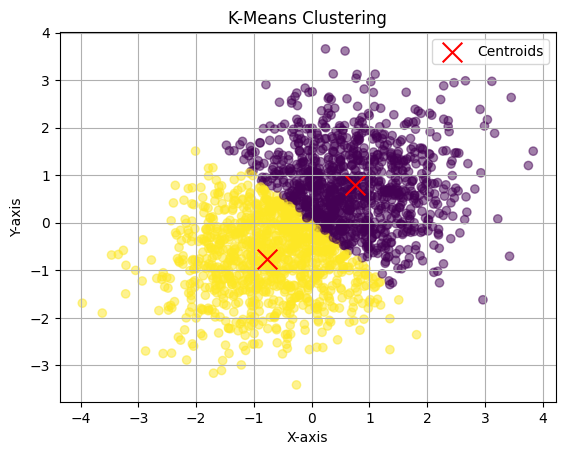

In [30]:
# Run K-Means on the dataset with 2 clusters
centroids, cluster_assignments = kmeans(X, k=2)
# Plot the clustered points
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()
